Practice Project - 6

## Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

### EDA

### Scatterplot:

<AxesSubplot:xlabel='TV', ylabel='sales'>

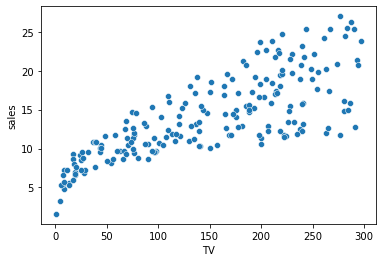

In [7]:
import seaborn as sns
sns.scatterplot(x="TV",y="sales",data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

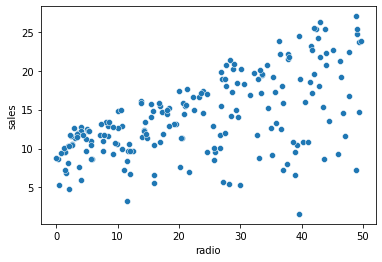

In [8]:
import seaborn as sns
sns.scatterplot(x="radio",y="sales",data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

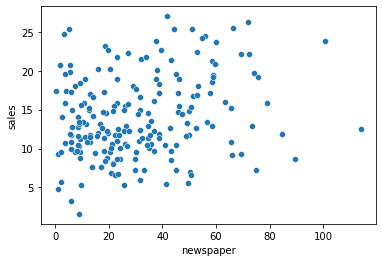

In [9]:
import seaborn as sns
sns.scatterplot(x="newspaper",y="sales",data=df)

### Correlation:

In [10]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

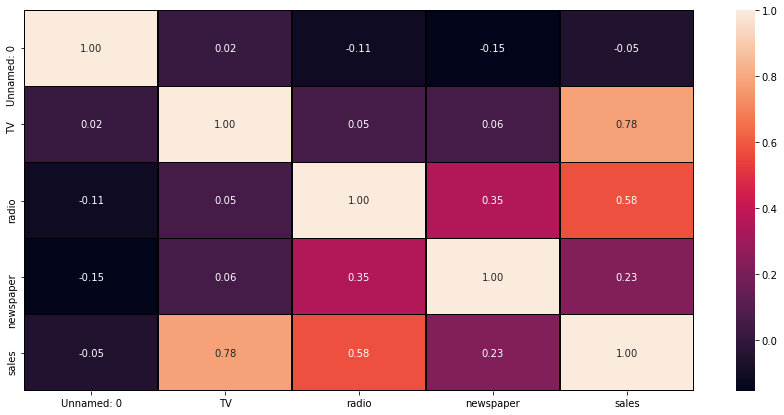

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Outcome of Correlation:
    
    TV has 78 percent with the target column which is considered as a strong bond. Radio has 58 percent with the target column which is considered as a very good bond. Newspaper has 23 percent with the target column which is considered as a weak bond. 
    
Max Correlation: TV

Min Correlation: Newspaper

### Describing Datasets:

In [12]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<function matplotlib.pyplot.show(close=None, block=None)>

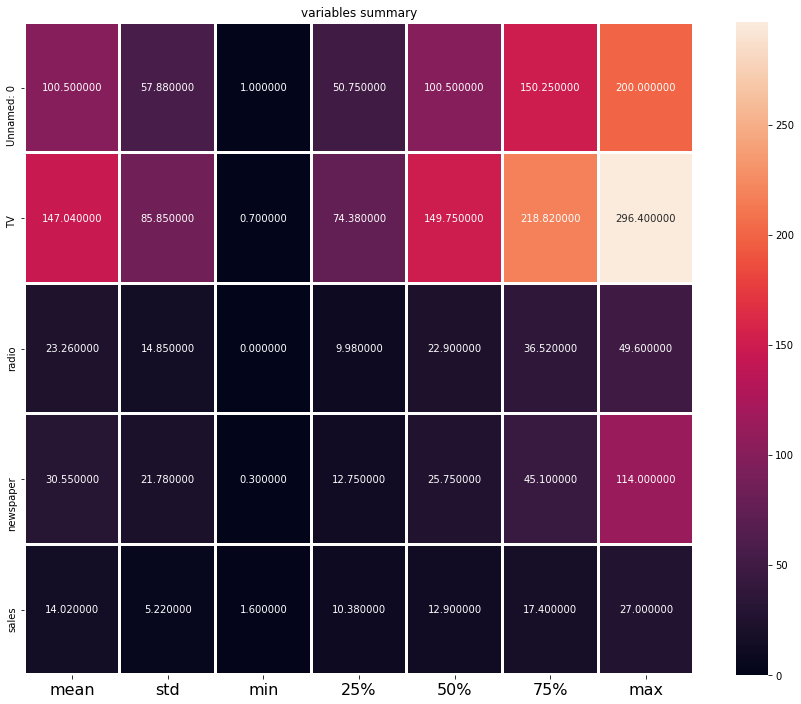

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=16)
plt.yticks(fontsize=10)
plt.title("variables summary")
plt.show

Outcome of the dataset:
    
    From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.
    
Total Number of rows in datasets:

1. 200 rows
2. 5 columns

TV-

1. Mean= 147.042500
2. Std= 85.854236
3. Min= 0.700000
4. Max= 296.400000

Radio-

1. Mean= 23.264000
2. Std= 14.846809
3. Min= 0
4. Max= 49.600000

Newspaper-

1. Mean= 30.554000
2. Std= 21.778621
3. Min= 0.300000
4. Max= 114.000000

Sales-

1. Mean= 14.022500
2. Std= 5.217457
3. Min= 1.600000
4. Max= 27.000000

Unnamed-

1. Mean= 100.500000
2. Std= 57.879185
3. Min= 1
4. Max= 200

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Outliers Checking:

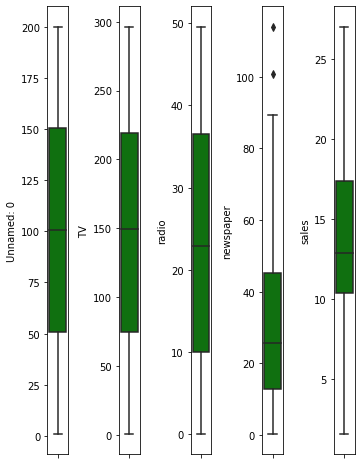

In [15]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above outcome we can see that columns['Newspaper'] has less outliers and columns['Unnamed','TV','Radio','Sales'] has no outliers.

### Skewness:

In [16]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Outcome of the Skewness:
    
    Skewness threshold is taken 

### Normal Distribution Curve:

<AxesSubplot:xlabel='TV', ylabel='Density'>

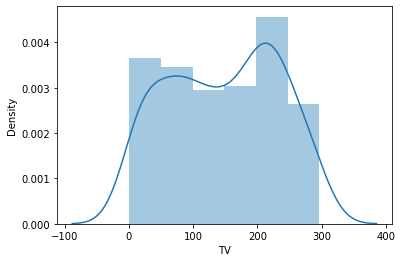

In [17]:
sns.distplot(df["TV"])

The data of the column is not normalised.The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='radio', ylabel='Density'>

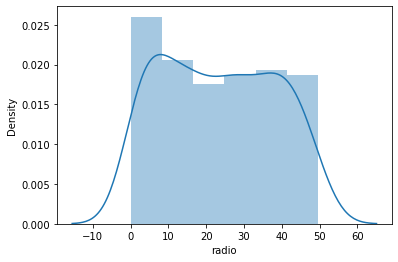

In [18]:
sns.distplot(df["radio"])

The data of the column is not normalised.The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

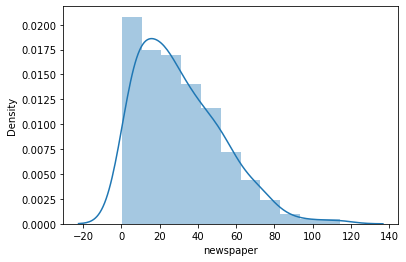

In [19]:
sns.distplot(df["newspaper"])

The data of the column is not normalised.The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='sales', ylabel='Density'>

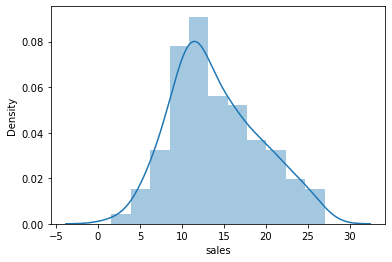

In [20]:
sns.distplot(df["sales"])

The data of the column is not normalised.The building blocks is out of the normalised curve.

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Density'>

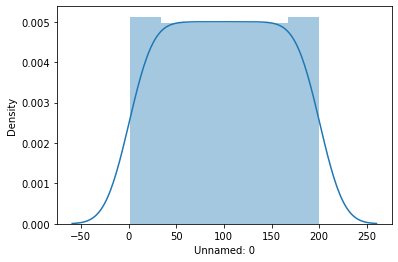

In [22]:
sns.distplot(df["Unnamed: 0"])

The data of the column is not normalised.The building blocks is out of the normalised curve.

The Normal Distribution Curve shows that the data is skewed.

### Data Cleaning:

In [23]:
delete=pd.DataFrame([["(0.051616)","Unnamed: 0","No","No"],["0.228299","newspaper","No","Less"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,(0.051616),Unnamed: 0,No,No
1,0.228299,newspaper,No,Less


Here, we are settling threshold of correlation as +/-1.It is not standard.The dataset demands.

In [24]:
df=df.drop(["Unnamed: 0","newspaper"],axis=1)

In [25]:
df

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


### Removing Outliers:

Z-Score Technique:

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(200, 3)

In [27]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 3)
(200, 3)


Percentage Data Loss:

In [30]:
loss_percent=(200-200)/200*100
print(loss_percent)

0.0


Checking whether how much outliers are still there.If the outliers there help in testing the model or not.

### Model without outliers is df_new amd model with desired outliers is df_new1:

Dividing data in features and vectors:

In [31]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

### Transforming data to remove skewness:

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [33]:
x

array([[ 0.94867429,  0.96224689],
       [-1.19131426,  1.0401788 ],
       [-1.6477566 ,  1.37070964],
       [ 0.14102023,  1.14238689],
       [ 0.45271493, -0.74865064],
       [-1.82382233,  1.51501853],
       [-1.00249116,  0.69372704],
       [-0.210275  , -0.10158544],
       [-1.82609501, -1.63345378],
       [ 0.64764492, -1.56676988],
       [-0.88377378, -1.20298758],
       [ 0.79708355,  0.18072579],
       [-1.52641627,  0.81900563],
       [-0.48036844, -1.02813642],
       [ 0.69106577,  0.6992403 ],
       [ 0.60295713,  1.45770359],
       [-0.86079972,  0.89906999],
       [ 1.4355201 ,  1.05563142],
       [-0.84199328, -0.04209908],
       [ 0.09508551,  0.17453165],
       [ 0.8337607 ,  0.40367061],
       [ 1.01958629, -1.27567304],
       [-1.72701642, -0.35739289],
       [ 0.93109798, -0.28631129],
       [-0.93569772, -0.60431061],
       [ 1.26290943, -1.4550585 ],
       [ 0.04659013,  0.49664406],
       [ 1.0456669 , -0.30040383],
       [ 1.12918152,

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689],
       [-1.19131426,  1.0401788 ],
       [-1.6477566 ,  1.37070964],
       [ 0.14102023,  1.14238689],
       [ 0.45271493, -0.74865064],
       [-1.82382233,  1.51501853],
       [-1.00249116,  0.69372704],
       [-0.210275  , -0.10158544],
       [-1.82609501, -1.63345378],
       [ 0.64764492, -1.56676988],
       [-0.88377378, -1.20298758],
       [ 0.79708355,  0.18072579],
       [-1.52641627,  0.81900563],
       [-0.48036844, -1.02813642],
       [ 0.69106577,  0.6992403 ],
       [ 0.60295713,  1.45770359],
       [-0.86079972,  0.89906999],
       [ 1.4355201 ,  1.05563142],
       [-0.84199328, -0.04209908],
       [ 0.09508551,  0.17453165],
       [ 0.8337607 ,  0.40367061],
       [ 1.01958629, -1.27567304],
       [-1.72701642, -0.35739289],
       [ 0.93109798, -0.28631129],
       [-0.93569772, -0.60431061],
       [ 1.26290943, -1.4550585 ],
       [ 0.04659013,  0.49664406],
       [ 1.0456669 , -0.30040383],
       [ 1.12918152,